In [1]:
import warnings
warnings.filterwarnings("ignore")

from config import get_config
from train import train_model, grid_search

import torch
import inference_helpers

import json

In [4]:
## randomized search
num_models = 8
best_model_params = []
for k in range(1, num_models+1):
    print(f"MODEL CROSS VALIDATING - #{k}")
    print(20*"--")
    config = get_config()
    config["model_folder"] = "cv_weights"
    config["experiment_name"] = "cv_run/tmodel"
    config["run"] = "cv_run"

    param_grid = {
        "d_ff": [64, 128, 256],
        "d_d": [128, 256],
        "Nx": [2, 4],
        "n_head": [2, 4],
        "dropout": [0.1, 0.25]
    }
    config["tgt_step"] = k-1
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    res, best_params, best_score = grid_search(config, device, lr_cv = 5*10**-5, n_epoch = 40, param_grid = param_grid, n_iter=20)
    best_model_params.append(best_params)
    print("Best params:", str(best_params))
    print(20*"--")

with open(f"params.json", "w") as outfile: 
    json.dump({"param_grid": param_grid, "best_params": best_model_params}, outfile)

MODEL CROSS VALIDATING - #1
----------------------------------------


  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


  5%|▌         | 1/20 [05:02<1:35:39, 302.09s/it]

Scores: 23443.62, 17560.13, 18880.52, 22728.90; avg score: 20653.29
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 10%|█         | 2/20 [09:58<1:29:32, 298.46s/it]

Scores: 26088.58, 16389.86, 19011.17, 21571.66; avg score: 20765.32
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 15%|█▌        | 3/20 [18:21<1:51:01, 391.87s/it]

Scores: 29040.05, 18378.32, 19512.45, 13793.01; avg score: 20180.96
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 20%|██        | 4/20 [26:44<1:56:16, 436.06s/it]

Scores: 29830.10, 16910.32, 18834.35, 13949.19; avg score: 19880.99
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 25%|██▌       | 5/20 [31:36<1:36:01, 384.09s/it]

Scores: 27389.46, 17188.38, 19259.31, 14458.54; avg score: 19573.92
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 30%|███       | 6/20 [39:57<1:38:53, 423.84s/it]

Scores: 33182.62, 17453.55, 18897.27, 22148.94; avg score: 22920.60
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 35%|███▌      | 7/20 [48:19<1:37:21, 449.35s/it]

Scores: 30234.61, 16854.28, 19222.83, 16602.74; avg score: 20728.62
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 40%|████      | 8/20 [56:40<1:33:08, 465.70s/it]

Scores: 28824.65, 18765.14, 20487.29, 14138.09; avg score: 20553.79
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 45%|████▌     | 9/20 [1:05:04<1:27:36, 477.87s/it]

Scores: 26243.31, 17934.25, 18187.57, 14112.44; avg score: 19119.39
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 50%|█████     | 10/20 [1:13:26<1:20:52, 485.30s/it]

Scores: 30199.68, 18291.41, 20095.40, 14523.75; avg score: 20777.56
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.1, 


 55%|█████▌    | 11/20 [1:18:21<1:04:03, 427.07s/it]

Scores: 25169.79, 16683.75, 18533.95, 13471.81; avg score: 18464.82
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 60%|██████    | 12/20 [1:26:43<59:57, 449.65s/it]  

Scores: 32407.31, 17897.09, 19779.63, 14670.85; avg score: 21188.72
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:31:37<46:58, 402.65s/it]

Scores: 25285.45, 17560.08, 19558.46, 22560.43; avg score: 21241.11
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 70%|███████   | 14/20 [1:40:02<43:20, 433.49s/it]

Scores: 28569.32, 17810.92, 20737.93, 16816.06; avg score: 20983.56
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.25, 


 75%|███████▌  | 15/20 [1:48:30<37:59, 455.85s/it]

Scores: 26521.18, 17655.69, 18939.85, 22847.45; avg score: 21491.04
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 80%|████████  | 16/20 [1:53:26<27:11, 407.92s/it]

Scores: 27161.67, 17380.01, 18648.24, 13428.26; avg score: 19154.55
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 85%|████████▌ | 17/20 [1:58:18<18:39, 373.10s/it]

Scores: 28108.86, 17822.96, 20289.07, 18861.50; avg score: 21270.60
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 90%|█████████ | 18/20 [2:06:46<13:46, 413.42s/it]

Scores: 28425.47, 18693.04, 18590.74, 18355.29; avg score: 21016.13
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.1, 


 95%|█████████▌| 19/20 [2:15:12<07:21, 441.28s/it]

Scores: 25674.46, 18091.70, 18519.27, 23272.63; avg score: 21389.52
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 2, dropout: 0.1, 


100%|██████████| 20/20 [2:23:37<00:00, 430.90s/it]

Scores: 30531.11, 17235.99, 19500.86, 25065.47; avg score: 23083.36
--------------------
Best params: {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.1}
----------------------------------------
MODEL CROSS VALIDATING - #2
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


  5%|▌         | 1/20 [04:56<1:33:53, 296.51s/it]

Scores: 31769.95, 22214.46, 24908.15, 20115.79; avg score: 24752.09
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.1, 


 10%|█         | 2/20 [09:49<1:28:22, 294.58s/it]

Scores: 35348.32, 22327.78, 25208.80, 19585.10; avg score: 25617.50
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 15%|█▌        | 3/20 [18:15<1:50:44, 390.86s/it]

Scores: 31270.01, 23214.78, 25115.21, 18586.42; avg score: 24546.60
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 20%|██        | 4/20 [26:39<1:56:10, 435.67s/it]

Scores: 37821.98, 23712.20, 24794.02, 22634.82; avg score: 27240.75
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 25%|██▌       | 5/20 [31:34<1:36:13, 384.89s/it]

Scores: 30862.98, 22690.98, 25272.81, 23398.85; avg score: 25556.41
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 30%|███       | 6/20 [40:01<1:39:28, 426.31s/it]

Scores: 35864.46, 23165.04, 25685.09, 22743.88; avg score: 26864.62
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 35%|███▌      | 7/20 [44:58<1:23:13, 384.13s/it]

Scores: 33107.46, 22329.87, 24927.77, 22406.14; avg score: 25692.81
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 40%|████      | 8/20 [49:51<1:11:00, 355.03s/it]

Scores: 33176.98, 23491.51, 24812.82, 17408.42; avg score: 24722.43
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 45%|████▌     | 9/20 [54:42<1:01:26, 335.09s/it]

Scores: 32947.21, 22987.70, 25296.73, 18949.07; avg score: 25045.18
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 50%|█████     | 10/20 [59:35<53:40, 322.03s/it] 

Scores: 30871.92, 22126.09, 25100.51, 18245.95; avg score: 24086.12
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.1, 


 55%|█████▌    | 11/20 [1:04:33<47:14, 314.91s/it]

Scores: 31301.52, 23253.72, 25281.74, 22284.07; avg score: 25530.26
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


 60%|██████    | 12/20 [1:09:41<41:40, 312.58s/it]

Scores: 32980.84, 22281.01, 24666.79, 17307.00; avg score: 24308.91
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:14:41<36:01, 308.76s/it]

Scores: 31749.48, 22037.38, 24607.48, 19311.38; avg score: 24426.43
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.1, 


 70%|███████   | 14/20 [1:23:11<36:58, 369.70s/it]

Scores: 31806.18, 23769.12, 25397.77, 18663.02; avg score: 24909.02
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 75%|███████▌  | 15/20 [1:31:53<34:37, 415.57s/it]

Scores: 38192.74, 25175.92, 25977.10, 22355.71; avg score: 27925.37
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 80%|████████  | 16/20 [1:40:26<29:39, 444.85s/it]

Scores: 34757.60, 23648.50, 24942.99, 22403.20; avg score: 26438.07
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 85%|████████▌ | 17/20 [1:48:49<23:07, 462.40s/it]

Scores: 37583.43, 23820.58, 25894.69, 22442.32; avg score: 27435.26
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 90%|█████████ | 18/20 [1:57:10<15:48, 474.04s/it]

Scores: 36399.65, 25108.84, 26747.32, 19361.11; avg score: 26904.23
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 95%|█████████▌| 19/20 [2:05:31<08:02, 482.21s/it]

Scores: 35853.11, 24329.54, 24860.36, 18351.00; avg score: 25848.51
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


100%|██████████| 20/20 [2:10:25<00:00, 391.29s/it]

Scores: 31101.05, 22228.46, 25062.38, 17699.29; avg score: 24022.80
--------------------
Best params: {'d_ff': 64, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #3
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


  5%|▌         | 1/20 [08:24<2:39:46, 504.56s/it]

Scores: 37875.74, 25353.82, 27252.84, 20830.09; avg score: 27828.12
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 10%|█         | 2/20 [16:47<2:31:03, 503.54s/it]

Scores: 38950.14, 25404.38, 27709.78, 23756.09; avg score: 28955.10
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 15%|█▌        | 3/20 [25:11<2:22:42, 503.67s/it]

Scores: 37967.42, 25252.20, 27279.61, 20321.51; avg score: 27705.18
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 20%|██        | 4/20 [33:32<2:14:01, 502.62s/it]

Scores: 38889.68, 25883.14, 28014.35, 19853.46; avg score: 28160.16
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 4, dropout: 0.25, 


 25%|██▌       | 5/20 [41:55<2:05:45, 503.04s/it]

Scores: 36858.07, 26311.45, 27473.20, 20925.41; avg score: 27892.03
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 30%|███       | 6/20 [50:19<1:57:25, 503.27s/it]

Scores: 37863.25, 25417.83, 27040.63, 19435.71; avg score: 27439.35
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.25, 


 35%|███▌      | 7/20 [58:44<1:49:07, 503.67s/it]

Scores: 37657.77, 26675.85, 26583.67, 22265.94; avg score: 28295.81
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 40%|████      | 8/20 [1:03:36<1:27:17, 436.49s/it]

Scores: 35884.63, 24357.68, 26989.27, 19157.56; avg score: 26597.28
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 45%|████▌     | 9/20 [1:11:56<1:23:39, 456.31s/it]

Scores: 37902.11, 26199.92, 26899.24, 19990.94; avg score: 27748.05
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 4, dropout: 0.1, 


 50%|█████     | 10/20 [1:16:51<1:07:45, 406.51s/it]

Scores: 34905.58, 24227.11, 26398.25, 18371.76; avg score: 25975.67
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 55%|█████▌    | 11/20 [1:21:44<55:43, 371.54s/it]  

Scores: 34316.59, 25922.28, 26537.76, 18733.62; avg score: 26377.57
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 60%|██████    | 12/20 [1:26:35<46:16, 347.05s/it]

Scores: 35706.98, 24446.33, 27562.72, 20686.62; avg score: 27100.66
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:31:26<38:30, 330.07s/it]

Scores: 37045.84, 24436.57, 26958.17, 18581.72; avg score: 26755.57
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 70%|███████   | 14/20 [1:39:48<38:12, 382.02s/it]

Scores: 37716.07, 26858.26, 27568.09, 20872.64; avg score: 28253.77
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 75%|███████▌  | 15/20 [1:44:42<29:38, 355.65s/it]

Scores: 32200.76, 25336.59, 26470.85, 19014.91; avg score: 25755.78
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 80%|████████  | 16/20 [1:53:04<26:38, 399.67s/it]

Scores: 38365.77, 26106.49, 28037.79, 19565.16; avg score: 28018.80
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 85%|████████▌ | 17/20 [1:57:57<18:22, 367.58s/it]

Scores: 36679.54, 25469.56, 26443.29, 23342.29; avg score: 27983.67
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 90%|█████████ | 18/20 [2:06:21<13:36, 408.45s/it]

Scores: 38718.77, 27219.38, 27308.06, 18803.23; avg score: 28012.36
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 95%|█████████▌| 19/20 [2:11:14<06:13, 373.93s/it]

Scores: 35935.04, 24555.62, 26399.10, 18265.63; avg score: 26288.85
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


100%|██████████| 20/20 [2:16:09<00:00, 408.49s/it]

Scores: 34421.67, 25640.02, 26833.07, 18635.02; avg score: 26382.45
--------------------
Best params: {'d_ff': 256, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #4
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


  5%|▌         | 1/20 [08:23<2:39:30, 503.69s/it]

Scores: 37999.92, 29359.43, 28396.49, 19067.58; avg score: 28705.85
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


 10%|█         | 2/20 [13:19<1:54:27, 381.52s/it]

Scores: 36667.44, 25287.06, 27534.37, 20646.64; avg score: 27533.88
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 15%|█▌        | 3/20 [18:16<1:37:05, 342.69s/it]

Scores: 39258.71, 26155.73, 27200.55, 19668.13; avg score: 28070.78
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 20%|██        | 4/20 [26:45<1:48:53, 408.34s/it]

Scores: 38639.02, 26659.92, 27958.80, 22965.58; avg score: 29055.83
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 25%|██▌       | 5/20 [31:38<1:31:45, 367.03s/it]

Scores: 36232.45, 25399.00, 27217.64, 20641.59; avg score: 27372.67
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


 30%|███       | 6/20 [36:35<1:20:05, 343.23s/it]

Scores: 34825.97, 26007.68, 27167.65, 21267.98; avg score: 27317.32
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 35%|███▌      | 7/20 [45:00<1:25:46, 395.88s/it]

Scores: 38632.14, 27495.63, 27886.55, 19793.18; avg score: 28451.88
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 2, dropout: 0.1, 


 40%|████      | 8/20 [53:26<1:26:11, 430.92s/it]

Scores: 38187.19, 29909.29, 27492.83, 19953.77; avg score: 28885.77
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 45%|████▌     | 9/20 [58:22<1:11:16, 388.76s/it]

Scores: 36266.86, 26185.96, 28154.60, 22208.83; avg score: 28204.06
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 50%|█████     | 10/20 [1:06:44<1:10:38, 423.86s/it]

Scores: 38083.75, 26574.79, 28259.92, 22787.97; avg score: 28926.61
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 55%|█████▌    | 11/20 [1:15:10<1:07:19, 448.84s/it]

Scores: 38110.39, 28008.90, 27634.46, 19555.99; avg score: 28327.44
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 60%|██████    | 12/20 [1:23:34<1:02:04, 465.57s/it]

Scores: 38144.64, 26984.82, 27767.80, 22289.96; avg score: 28796.81
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:28:30<48:21, 414.44s/it]  

Scores: 37907.79, 25462.93, 27526.10, 22257.85; avg score: 28288.67
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 70%|███████   | 14/20 [1:33:21<37:43, 377.21s/it]

Scores: 35160.77, 26193.83, 27745.55, 21198.86; avg score: 27574.75
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 75%|███████▌  | 15/20 [1:38:17<29:23, 352.69s/it]

Scores: 38687.03, 25817.35, 28005.66, 22176.67; avg score: 28671.67
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 80%|████████  | 16/20 [1:46:41<26:32, 398.16s/it]

Scores: 38172.96, 28051.56, 29902.64, 21267.83; avg score: 29348.75
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


 85%|████████▌ | 17/20 [1:51:37<18:22, 367.40s/it]

Scores: 37618.44, 25821.19, 27768.54, 19116.11; avg score: 27581.07
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 90%|█████████ | 18/20 [2:00:02<13:37, 408.83s/it]

Scores: 38784.94, 26946.84, 28642.04, 20261.59; avg score: 28658.85
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 4, dropout: 0.1, 


 95%|█████████▌| 19/20 [2:04:55<06:14, 374.09s/it]

Scores: 37714.30, 25145.78, 27544.10, 18985.61; avg score: 27347.45
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


100%|██████████| 20/20 [2:09:53<00:00, 389.69s/it]

Scores: 37962.48, 25915.42, 27727.05, 18805.46; avg score: 27602.60
--------------------
Best params: {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 2, 'dropout': 0.1}
----------------------------------------
MODEL CROSS VALIDATING - #5
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.1, 


  5%|▌         | 1/20 [04:54<1:33:07, 294.10s/it]

Scores: 37912.57, 28511.15, 29606.02, 22243.38; avg score: 29568.28
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


 10%|█         | 2/20 [09:49<1:28:32, 295.15s/it]

Scores: 37557.51, 27408.95, 29703.33, 19900.29; avg score: 28642.52
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 15%|█▌        | 3/20 [18:18<1:51:13, 392.58s/it]

Scores: 38800.48, 29360.13, 31169.17, 24205.32; avg score: 30883.78
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 4, dropout: 0.25, 


 20%|██        | 4/20 [26:49<1:57:10, 439.39s/it]

Scores: 38632.64, 29671.05, 32351.75, 23137.55; avg score: 30948.25
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 25%|██▌       | 5/20 [35:14<1:55:45, 463.00s/it]

Scores: 38973.93, 29206.93, 31574.18, 21611.31; avg score: 30341.59
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 30%|███       | 6/20 [43:38<1:51:17, 476.97s/it]

Scores: 38545.36, 29411.43, 30956.54, 22205.74; avg score: 30279.77
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 35%|███▌      | 7/20 [48:30<1:30:12, 416.33s/it]

Scores: 38209.04, 27256.38, 30584.27, 20591.76; avg score: 29160.36
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 40%|████      | 8/20 [56:54<1:28:51, 444.30s/it]

Scores: 37794.87, 29532.51, 29875.44, 21533.89; avg score: 29684.18
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 45%|████▌     | 9/20 [1:05:14<1:24:40, 461.86s/it]

Scores: 39270.83, 29305.61, 32300.30, 22030.69; avg score: 30726.86
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 50%|█████     | 10/20 [1:10:08<1:08:19, 409.95s/it]

Scores: 37934.36, 27437.16, 30064.45, 20626.53; avg score: 29015.62
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 55%|█████▌    | 11/20 [1:18:28<1:05:38, 437.64s/it]

Scores: 38599.63, 29324.83, 31400.68, 21712.97; avg score: 30259.53
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 60%|██████    | 12/20 [1:26:47<1:00:49, 456.15s/it]

Scores: 38421.66, 29322.41, 32637.44, 21221.33; avg score: 30400.71
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:31:41<47:29, 407.13s/it]  

Scores: 38783.65, 28350.56, 30165.57, 20162.14; avg score: 29365.48
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 70%|███████   | 14/20 [1:36:36<37:18, 373.06s/it]

Scores: 38796.32, 28011.51, 29983.44, 19823.38; avg score: 29153.66
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 75%|███████▌  | 15/20 [1:41:26<29:01, 348.31s/it]

Scores: 37940.10, 28884.04, 30441.59, 23805.74; avg score: 30267.87
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 80%|████████  | 16/20 [1:46:19<22:06, 331.62s/it]

Scores: 38607.30, 28411.56, 30478.70, 20200.99; avg score: 29424.64
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 85%|████████▌ | 17/20 [1:54:38<19:05, 381.87s/it]

Scores: 38821.07, 30505.67, 32861.18, 22279.10; avg score: 31116.76
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 2, dropout: 0.1, 


 90%|█████████ | 18/20 [2:02:59<13:55, 417.66s/it]

Scores: 38768.51, 29049.86, 30079.28, 22613.83; avg score: 30127.87
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 95%|█████████▌| 19/20 [2:07:49<06:19, 379.38s/it]

Scores: 38894.53, 28341.17, 30309.47, 21013.58; avg score: 29639.69
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


100%|██████████| 20/20 [2:12:45<00:00, 398.30s/it]

Scores: 38165.25, 28462.30, 29426.04, 22566.09; avg score: 29654.92
--------------------
Best params: {'d_ff': 64, 'd_d': 256, 'Nx': 2, 'n_head': 2, 'dropout': 0.1}
----------------------------------------
MODEL CROSS VALIDATING - #6
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


  5%|▌         | 1/20 [04:52<1:32:38, 292.58s/it]

Scores: 38429.33, 29117.24, 32006.35, 24102.34; avg score: 30913.81
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


 10%|█         | 2/20 [09:58<1:30:08, 300.45s/it]

Scores: 38607.55, 28743.21, 30920.22, 21403.71; avg score: 29918.67
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 15%|█▌        | 3/20 [18:24<1:51:40, 394.16s/it]

Scores: 38893.59, 29966.49, 32569.65, 23395.01; avg score: 31206.19
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 20%|██        | 4/20 [23:17<1:34:29, 354.34s/it]

Scores: 38750.93, 28889.89, 32375.39, 20963.30; avg score: 30244.88
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 25%|██▌       | 5/20 [31:43<1:42:15, 409.05s/it]

Scores: 39179.73, 29767.37, 31612.18, 21880.37; avg score: 30609.91
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 30%|███       | 6/20 [40:06<1:42:51, 440.82s/it]

Scores: 38757.29, 29574.00, 32550.27, 22669.23; avg score: 30887.70
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 35%|███▌      | 7/20 [44:58<1:25:01, 392.41s/it]

Scores: 38759.68, 28836.85, 30696.00, 21839.76; avg score: 30033.07
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 40%|████      | 8/20 [53:21<1:25:30, 427.57s/it]

Scores: 39143.09, 30009.83, 32398.89, 22948.47; avg score: 31125.07
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 45%|████▌     | 9/20 [58:16<1:10:45, 385.94s/it]

Scores: 38565.34, 29916.62, 32238.57, 22340.52; avg score: 30765.26
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 50%|█████     | 10/20 [1:06:40<1:10:23, 422.38s/it]

Scores: 38804.37, 29592.30, 31963.80, 22943.95; avg score: 30826.11
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 55%|█████▌    | 11/20 [1:15:04<1:07:07, 447.49s/it]

Scores: 38816.31, 29322.77, 32237.21, 22769.14; avg score: 30786.36
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.1, 


 60%|██████    | 12/20 [1:19:58<53:26, 400.87s/it]  

Scores: 38646.48, 29116.45, 30802.37, 21235.08; avg score: 29950.10
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:24:54<43:02, 368.96s/it]

Scores: 38609.73, 28433.46, 31219.10, 21281.72; avg score: 29886.00
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 70%|███████   | 14/20 [1:29:48<34:38, 346.39s/it]

Scores: 38587.01, 29238.46, 31707.17, 21096.89; avg score: 30157.38
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 4, dropout: 0.1, 


 75%|███████▌  | 15/20 [1:34:42<27:32, 330.54s/it]

Scores: 38337.72, 29207.69, 31530.34, 22836.37; avg score: 30478.03
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 80%|████████  | 16/20 [1:43:08<25:33, 383.38s/it]

Scores: 38379.15, 29816.75, 32281.57, 23816.71; avg score: 31073.54
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 85%|████████▌ | 17/20 [1:48:04<17:51, 357.22s/it]

Scores: 38678.71, 29301.56, 30820.46, 21030.70; avg score: 29957.86
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 90%|█████████ | 18/20 [1:56:28<13:22, 401.29s/it]

Scores: 38852.40, 30180.60, 31727.11, 23383.49; avg score: 31035.90
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 95%|█████████▌| 19/20 [2:04:54<07:12, 432.65s/it]

Scores: 38834.59, 29295.30, 31151.50, 23909.64; avg score: 30797.76
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.1, 


100%|██████████| 20/20 [2:09:50<00:00, 389.50s/it]

Scores: 39021.62, 29314.54, 31307.75, 21644.70; avg score: 30322.16
--------------------
Best params: {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #7
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


  5%|▌         | 1/20 [04:50<1:32:03, 290.73s/it]

Scores: 38033.34, 29414.10, 31947.75, 22189.59; avg score: 30396.20
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 10%|█         | 2/20 [13:11<2:04:13, 414.06s/it]

Scores: 38885.44, 29508.30, 32191.96, 22459.81; avg score: 30761.38
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 15%|█▌        | 3/20 [18:05<1:41:50, 359.43s/it]

Scores: 38506.98, 29531.20, 32517.57, 21729.07; avg score: 30571.20
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.1, 


 20%|██        | 4/20 [26:28<1:50:56, 416.03s/it]

Scores: 38974.84, 29279.46, 31571.09, 23104.80; avg score: 30732.55
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 25%|██▌       | 5/20 [34:52<1:51:54, 447.63s/it]

Scores: 38576.85, 30034.30, 32539.94, 23486.08; avg score: 31159.29
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 30%|███       | 6/20 [43:14<1:48:50, 466.44s/it]

Scores: 38448.04, 29591.31, 31730.61, 21935.94; avg score: 30426.48
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 35%|███▌      | 7/20 [48:07<1:28:45, 409.63s/it]

Scores: 38647.23, 29522.94, 32146.97, 23640.97; avg score: 30989.53
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 40%|████      | 8/20 [52:59<1:14:26, 372.21s/it]

Scores: 38712.50, 29212.01, 32098.51, 22192.65; avg score: 30553.92
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 45%|████▌     | 9/20 [57:52<1:03:39, 347.23s/it]

Scores: 39070.85, 29466.94, 32529.33, 23329.77; avg score: 31099.22
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 50%|█████     | 10/20 [1:06:15<1:05:56, 395.60s/it]

Scores: 38888.37, 29526.24, 32748.63, 25178.80; avg score: 31585.51
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 55%|█████▌    | 11/20 [1:14:41<1:04:23, 429.26s/it]

Scores: 38797.53, 29807.76, 31626.72, 21677.48; avg score: 30477.37
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 60%|██████    | 12/20 [1:23:05<1:00:15, 451.89s/it]

Scores: 38860.86, 29650.45, 31433.48, 22370.68; avg score: 30578.87
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 65%|██████▌   | 13/20 [1:28:00<47:10, 404.38s/it]  

Scores: 38557.52, 29083.14, 32150.79, 23678.33; avg score: 30867.45
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.1, 


 70%|███████   | 14/20 [1:32:54<37:07, 371.26s/it]

Scores: 38596.62, 29341.70, 31910.74, 22142.06; avg score: 30497.78
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 75%|███████▌  | 15/20 [1:41:22<34:21, 412.33s/it]

Scores: 38850.36, 29847.86, 31040.24, 23598.62; avg score: 30834.27
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 80%|████████  | 16/20 [1:46:14<25:04, 376.20s/it]

Scores: 38968.71, 29771.69, 31951.29, 20819.18; avg score: 30377.72
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 85%|████████▌ | 17/20 [1:51:11<17:36, 352.25s/it]

Scores: 38584.93, 28394.53, 31070.94, 21824.60; avg score: 29968.75
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 90%|█████████ | 18/20 [1:59:36<13:16, 398.30s/it]

Scores: 38956.70, 29977.93, 32922.22, 22711.05; avg score: 31141.98
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.1, 


 95%|█████████▌| 19/20 [2:04:31<06:07, 367.13s/it]

Scores: 38823.52, 28881.67, 31211.99, 21195.18; avg score: 30028.09
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 4, n_head: 4, dropout: 0.25, 


100%|██████████| 20/20 [2:13:01<00:00, 399.09s/it]

Scores: 38868.45, 29718.00, 32363.73, 22244.56; avg score: 30798.69
--------------------
Best params: {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 2, 'dropout': 0.25}
----------------------------------------
MODEL CROSS VALIDATING - #8
----------------------------------------



  0%|          | 0/20 [00:00<?, ?it/s]

hyperparams: d_ff: 128, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


  5%|▌         | 1/20 [04:53<1:33:00, 293.69s/it]

Scores: 38893.28, 30160.46, 32184.29, 21591.30; avg score: 30707.33
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 10%|█         | 2/20 [09:50<1:28:40, 295.59s/it]

Scores: 38785.96, 29152.32, 31271.98, 22007.82; avg score: 30304.52
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 2, n_head: 2, dropout: 0.25, 


 15%|█▌        | 3/20 [14:43<1:23:23, 294.33s/it]

Scores: 38387.63, 29167.50, 32592.21, 22329.65; avg score: 30619.25
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 20%|██        | 4/20 [23:05<1:40:19, 376.24s/it]

Scores: 38453.36, 29758.72, 32515.40, 22827.79; avg score: 30888.82
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 25%|██▌       | 5/20 [31:41<1:46:41, 426.76s/it]

Scores: 38367.61, 30140.41, 32862.04, 22922.94; avg score: 31073.25
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 2, dropout: 0.25, 


 30%|███       | 6/20 [40:19<1:46:48, 457.75s/it]

Scores: 38808.72, 30431.01, 33102.79, 22145.74; avg score: 31122.07
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 4, dropout: 0.25, 


 35%|███▌      | 7/20 [45:18<1:27:54, 405.70s/it]

Scores: 38669.15, 29185.68, 32200.30, 22245.53; avg score: 30575.16
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.25, 


 40%|████      | 8/20 [53:47<1:27:43, 438.62s/it]

Scores: 38883.25, 30207.03, 32472.72, 24054.83; avg score: 31404.46
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 4, dropout: 0.25, 


 45%|████▌     | 9/20 [1:02:24<1:24:56, 463.34s/it]

Scores: 39025.42, 29887.90, 32336.99, 22554.59; avg score: 30951.22
--------------------
hyperparams: d_ff: 64, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 50%|█████     | 10/20 [1:11:03<1:20:03, 480.34s/it]

Scores: 38829.77, 29549.63, 32583.32, 21822.11; avg score: 30696.21
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 4, n_head: 4, dropout: 0.1, 


 55%|█████▌    | 11/20 [1:19:41<1:13:48, 492.02s/it]

Scores: 38884.60, 30029.46, 32098.82, 22320.56; avg score: 30833.36
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 60%|██████    | 12/20 [1:28:28<1:07:00, 502.60s/it]

Scores: 38832.14, 29909.27, 31777.91, 22091.54; avg score: 30652.72
--------------------
hyperparams: d_ff: 256, d_d: 256, Nx: 2, n_head: 4, dropout: 0.1, 


 65%|██████▌   | 13/20 [1:33:27<51:27, 441.06s/it]  

Scores: 38813.48, 28921.96, 30889.13, 21241.24; avg score: 29966.45
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


 70%|███████   | 14/20 [1:38:33<40:00, 400.17s/it]

Scores: 38752.95, 29391.89, 32075.50, 22356.35; avg score: 30644.17
--------------------
hyperparams: d_ff: 256, d_d: 128, Nx: 2, n_head: 2, dropout: 0.1, 


 75%|███████▌  | 15/20 [1:43:33<30:49, 369.92s/it]

Scores: 38823.59, 29504.99, 32550.62, 21875.93; avg score: 30688.78
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 4, n_head: 4, dropout: 0.1, 


 80%|████████  | 16/20 [1:52:10<27:36, 414.05s/it]

Scores: 38876.00, 29681.63, 32559.49, 23855.79; avg score: 31243.23
--------------------
hyperparams: d_ff: 64, d_d: 256, Nx: 2, n_head: 4, dropout: 0.25, 


 85%|████████▌ | 17/20 [1:57:13<19:02, 380.92s/it]

Scores: 38728.94, 29489.26, 31889.94, 21889.72; avg score: 30499.46
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 4, dropout: 0.1, 


 90%|█████████ | 18/20 [2:02:16<11:54, 357.29s/it]

Scores: 38634.46, 29454.19, 31118.87, 21449.03; avg score: 30164.14
--------------------
hyperparams: d_ff: 128, d_d: 128, Nx: 4, n_head: 2, dropout: 0.1, 


 95%|█████████▌| 19/20 [2:10:52<06:45, 405.02s/it]

Scores: 38802.46, 29611.50, 32422.79, 23432.12; avg score: 31067.22
--------------------
hyperparams: d_ff: 128, d_d: 256, Nx: 2, n_head: 2, dropout: 0.25, 


100%|██████████| 20/20 [2:15:56<00:00, 407.85s/it]

Scores: 38705.87, 29739.51, 32044.50, 21336.10; avg score: 30456.49
--------------------
Best params: {'d_ff': 256, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.1}
----------------------------------------


In [5]:
best_model_params

[{'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.1},
 {'d_ff': 64, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.25},
 {'d_ff': 256, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.25},
 {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 2, 'dropout': 0.1},
 {'d_ff': 64, 'd_d': 256, 'Nx': 2, 'n_head': 2, 'dropout': 0.1},
 {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.25},
 {'d_ff': 128, 'd_d': 256, 'Nx': 2, 'n_head': 2, 'dropout': 0.25},
 {'d_ff': 256, 'd_d': 256, 'Nx': 2, 'n_head': 4, 'dropout': 0.1}]

In [13]:
## Multiple model training
cfg = get_config()
num_models0 = 1
num_models1 = 2

for k in range(num_models0, num_models1+1):
    print(f"MODEL TRAINING - #{k}")
    print(20*"-")
    cfg = get_config()
    cfg['preload'] = f'144'
    cfg['num_epochs'] = 180

    cfg["tgt_step"] = k-1
    cfg['run'] += f"_{k}"
    cfg['model_folder'] += cfg['run']
    cfg['experiment_name'] = f"runs_{cfg['run']}/tmodel"

    for param_name in param_grid.keys():
        cfg[param_name] = best_model_params[k-1][param_name]

    model = train_model(cfg)

    # save config to JSON
    with open(f"{cfg['run']}.json", "w") as outfile: 
        json.dump(cfg, outfile)
    print(20*"-")

MODEL TRAINING - #1
--------------------
Using device: cuda
Preloading model weights_folder\weightsforward_1\tmodel_144.pt


Processing Epoch 145: 100%|██████████| 626/626 [00:04<00:00, 126.05it/s, step_loss=24374.963]


Training loss of epoch 145: 14017.879067710413


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 145: 14116.923828125


Processing Epoch 146: 100%|██████████| 626/626 [00:04<00:00, 126.94it/s, step_loss=8337.382] 


Training loss of epoch 146: 13953.83445705621


100%|██████████| 14/14 [00:00<00:00, 147.76it/s]


Validation loss of epoch 146: 14164.7255859375


Processing Epoch 147: 100%|██████████| 626/626 [00:04<00:00, 125.36it/s, step_loss=20050.463]


Training loss of epoch 147: 14010.820369440145


100%|██████████| 14/14 [00:00<00:00, 134.98it/s]


Validation loss of epoch 147: 14148.263671875


Processing Epoch 148: 100%|██████████| 626/626 [00:04<00:00, 125.78it/s, step_loss=10418.099]


Training loss of epoch 148: 13978.660044709715


100%|██████████| 14/14 [00:00<00:00, 112.30it/s]


Validation loss of epoch 148: 14131.0517578125


Processing Epoch 149: 100%|██████████| 626/626 [00:04<00:00, 125.74it/s, step_loss=10530.021]


Training loss of epoch 149: 13952.187272239416


100%|██████████| 14/14 [00:00<00:00, 40.22it/s]


Validation loss of epoch 149: 14139.580078125


Processing Epoch 150: 100%|██████████| 626/626 [00:05<00:00, 124.64it/s, step_loss=9618.999] 


Training loss of epoch 150: 13931.777860891323


100%|██████████| 14/14 [00:00<00:00, 123.14it/s]


Validation loss of epoch 150: 14175.4404296875


Processing Epoch 151: 100%|██████████| 626/626 [00:04<00:00, 125.62it/s, step_loss=5886.203] 


Training loss of epoch 151: 13914.615764776358


100%|██████████| 14/14 [00:00<00:00, 127.61it/s]


Validation loss of epoch 151: 14031.4013671875


Processing Epoch 152: 100%|██████████| 626/626 [00:04<00:00, 126.83it/s, step_loss=20150.809]


Training loss of epoch 152: 13983.858316537291


100%|██████████| 14/14 [00:00<00:00, 152.53it/s]


Validation loss of epoch 152: 14071.6669921875


Processing Epoch 153: 100%|██████████| 626/626 [00:05<00:00, 125.04it/s, step_loss=8650.980] 


Training loss of epoch 153: 13897.519331569489


100%|██████████| 14/14 [00:00<00:00, 129.98it/s]


Validation loss of epoch 153: 14097.634765625


Processing Epoch 154: 100%|██████████| 626/626 [00:04<00:00, 126.78it/s, step_loss=46158.340]


Training loss of epoch 154: 14020.744126584965


100%|██████████| 14/14 [00:00<00:00, 154.26it/s]


Validation loss of epoch 154: 14102.265625


Processing Epoch 155: 100%|██████████| 626/626 [00:04<00:00, 126.84it/s, step_loss=24034.566]


Training loss of epoch 155: 13844.986569145616


100%|██████████| 14/14 [00:00<00:00, 134.95it/s]


Validation loss of epoch 155: 14271.9599609375


Processing Epoch 156: 100%|██████████| 626/626 [00:05<00:00, 124.92it/s, step_loss=11650.783]


Training loss of epoch 156: 13865.053811557758


100%|██████████| 14/14 [00:00<00:00, 129.98it/s]


Validation loss of epoch 156: 14101.498046875


Processing Epoch 157: 100%|██████████| 626/626 [00:04<00:00, 127.15it/s, step_loss=7695.116] 


Training loss of epoch 157: 13902.060065613769


100%|██████████| 14/14 [00:00<00:00, 128.75it/s]


Validation loss of epoch 157: 14385.73828125


Processing Epoch 158: 100%|██████████| 626/626 [00:04<00:00, 127.22it/s, step_loss=94556.312]


Training loss of epoch 158: 13963.914493841105


100%|██████████| 14/14 [00:00<00:00, 123.14it/s]


Validation loss of epoch 158: 14084.15234375


Processing Epoch 159: 100%|██████████| 626/626 [00:04<00:00, 126.22it/s, step_loss=12643.333]


Training loss of epoch 159: 13920.441552890376


100%|██████████| 14/14 [00:00<00:00, 134.98it/s]


Validation loss of epoch 159: 14074.76953125


Processing Epoch 160: 100%|██████████| 626/626 [00:04<00:00, 125.52it/s, step_loss=5805.015] 


Training loss of epoch 160: 13839.615841996556


100%|██████████| 14/14 [00:00<00:00, 150.94it/s]


Validation loss of epoch 160: 14121.8798828125


Processing Epoch 161: 100%|██████████| 626/626 [00:05<00:00, 124.64it/s, step_loss=9522.186] 


Training loss of epoch 161: 13836.652827351238


100%|██████████| 14/14 [00:00<00:00, 128.75it/s]


Validation loss of epoch 161: 14067.2021484375


Processing Epoch 162: 100%|██████████| 626/626 [00:05<00:00, 124.91it/s, step_loss=5604.245] 


Training loss of epoch 162: 13887.74654303115


100%|██████████| 14/14 [00:00<00:00, 136.29it/s]


Validation loss of epoch 162: 14134.220703125


Processing Epoch 163: 100%|██████████| 626/626 [00:04<00:00, 126.72it/s, step_loss=7215.222] 


Training loss of epoch 163: 13852.602128001448


100%|██████████| 14/14 [00:00<00:00, 119.05it/s]


Validation loss of epoch 163: 14148.0947265625


Processing Epoch 164: 100%|██████████| 626/626 [00:05<00:00, 124.20it/s, step_loss=5890.648] 


Training loss of epoch 164: 13884.876018682608


100%|██████████| 14/14 [00:00<00:00, 152.61it/s]


Validation loss of epoch 164: 14081.1923828125


Processing Epoch 165: 100%|██████████| 626/626 [00:04<00:00, 125.92it/s, step_loss=3356.651] 


Training loss of epoch 165: 13794.473549352286


100%|██████████| 14/14 [00:00<00:00, 131.19it/s]


Validation loss of epoch 165: 14090.208984375


Processing Epoch 166: 100%|██████████| 626/626 [00:05<00:00, 124.85it/s, step_loss=1234.378] 


Training loss of epoch 166: 13826.979629662852


100%|██████████| 14/14 [00:00<00:00, 128.78it/s]


Validation loss of epoch 166: 14118.302734375


Processing Epoch 167: 100%|██████████| 626/626 [00:04<00:00, 125.42it/s, step_loss=14940.147]


Training loss of epoch 167: 13812.651165946985


100%|██████████| 14/14 [00:00<00:00, 129.98it/s]


Validation loss of epoch 167: 14086.9580078125


Processing Epoch 168: 100%|██████████| 626/626 [00:05<00:00, 124.97it/s, step_loss=8008.254] 


Training loss of epoch 168: 13773.032742923822


100%|██████████| 14/14 [00:00<00:00, 116.98it/s]


Validation loss of epoch 168: 14143.521484375


Processing Epoch 169: 100%|██████████| 626/626 [00:04<00:00, 125.64it/s, step_loss=7813.025] 


Training loss of epoch 169: 13833.607896116215


100%|██████████| 14/14 [00:00<00:00, 134.97it/s]


Validation loss of epoch 169: 14149.73046875


Processing Epoch 170: 100%|██████████| 626/626 [00:05<00:00, 125.02it/s, step_loss=10683.163]


Training loss of epoch 170: 13788.523953861322


100%|██████████| 14/14 [00:00<00:00, 141.79it/s]


Validation loss of epoch 170: 14218.5615234375


Processing Epoch 171: 100%|██████████| 626/626 [00:05<00:00, 125.19it/s, step_loss=2997.835] 


Training loss of epoch 171: 13747.633616682058


100%|██████████| 14/14 [00:00<00:00, 137.62it/s]


Validation loss of epoch 171: 14160.521484375


Processing Epoch 172: 100%|██████████| 626/626 [00:05<00:00, 124.38it/s, step_loss=12865.466]


Training loss of epoch 172: 13845.195771921177


100%|██████████| 14/14 [00:00<00:00, 155.97it/s]


Validation loss of epoch 172: 14127.4853515625


Processing Epoch 173: 100%|██████████| 626/626 [00:04<00:00, 126.95it/s, step_loss=5378.339] 


Training loss of epoch 173: 13767.176561251998


100%|██████████| 14/14 [00:00<00:00, 123.13it/s]


Validation loss of epoch 173: 14086.1904296875


Processing Epoch 174: 100%|██████████| 626/626 [00:04<00:00, 125.95it/s, step_loss=13559.827]


Training loss of epoch 174: 13755.605197309305


100%|██████████| 14/14 [00:00<00:00, 109.67it/s]


Validation loss of epoch 174: 14161.30859375


Processing Epoch 175: 100%|██████████| 626/626 [00:04<00:00, 127.16it/s, step_loss=14450.771]


Training loss of epoch 175: 13790.115898156699


100%|██████████| 14/14 [00:00<00:00, 126.46it/s]


Validation loss of epoch 175: 14221.806640625


Processing Epoch 176: 100%|██████████| 626/626 [00:04<00:00, 126.17it/s, step_loss=3340.838] 


Training loss of epoch 176: 13759.140844960562


100%|██████████| 14/14 [00:00<00:00, 135.61it/s]


Validation loss of epoch 176: 14109.6796875


Processing Epoch 177: 100%|██████████| 626/626 [00:04<00:00, 126.56it/s, step_loss=8755.643] 


Training loss of epoch 177: 13780.5541797187


100%|██████████| 14/14 [00:00<00:00, 144.72it/s]


Validation loss of epoch 177: 14091.44921875


Processing Epoch 178: 100%|██████████| 626/626 [00:04<00:00, 125.22it/s, step_loss=10228.130]


Training loss of epoch 178: 13790.630282173523


100%|██████████| 14/14 [00:00<00:00, 128.78it/s]


Validation loss of epoch 178: 14086.8232421875


Processing Epoch 179: 100%|██████████| 626/626 [00:05<00:00, 124.13it/s, step_loss=9722.540] 


Training loss of epoch 179: 13772.478017983725


100%|██████████| 14/14 [00:00<00:00, 134.97it/s]


Validation loss of epoch 179: 14094.7314453125
--------------------
MODEL TRAINING - #2
--------------------
Using device: cuda
Preloading model weights_folder\weightsforward_2\tmodel_144.pt


Processing Epoch 145: 100%|██████████| 626/626 [00:05<00:00, 123.06it/s, step_loss=7604.164] 


Training loss of epoch 145: 20071.313610722842


100%|██████████| 14/14 [00:00<00:00, 144.67it/s]


Validation loss of epoch 145: 20654.267578125


Processing Epoch 146: 100%|██████████| 626/626 [00:05<00:00, 122.20it/s, step_loss=23965.492]


Training loss of epoch 146: 20097.305127421125


100%|██████████| 14/14 [00:00<00:00, 152.58it/s]


Validation loss of epoch 146: 20722.67578125


Processing Epoch 147: 100%|██████████| 626/626 [00:05<00:00, 124.23it/s, step_loss=23398.150]


Training loss of epoch 147: 20017.93625823682


100%|██████████| 14/14 [00:00<00:00, 137.62it/s]


Validation loss of epoch 147: 20629.478515625


Processing Epoch 148: 100%|██████████| 626/626 [00:05<00:00, 124.33it/s, step_loss=18315.420]


Training loss of epoch 148: 20023.21381258736


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 148: 20560.90625


Processing Epoch 149: 100%|██████████| 626/626 [00:05<00:00, 122.46it/s, step_loss=16711.322]


Training loss of epoch 149: 19960.748357315795


100%|██████████| 14/14 [00:00<00:00, 144.72it/s]


Validation loss of epoch 149: 21031.32421875


Processing Epoch 150: 100%|██████████| 626/626 [00:05<00:00, 123.95it/s, step_loss=5761.971] 


Training loss of epoch 150: 20035.705904927116


100%|██████████| 14/14 [00:00<00:00, 131.19it/s]


Validation loss of epoch 150: 21200.369140625


Processing Epoch 151: 100%|██████████| 626/626 [00:04<00:00, 126.47it/s, step_loss=38675.164]


Training loss of epoch 151: 20021.140706120208


100%|██████████| 14/14 [00:00<00:00, 124.22it/s]


Validation loss of epoch 151: 20734.6484375


Processing Epoch 152: 100%|██████████| 626/626 [00:05<00:00, 114.05it/s, step_loss=55533.449]


Training loss of epoch 152: 20068.6711324381


100%|██████████| 14/14 [00:00<00:00, 121.01it/s]


Validation loss of epoch 152: 20756.107421875


Processing Epoch 153: 100%|██████████| 626/626 [00:05<00:00, 117.46it/s, step_loss=9781.504] 


Training loss of epoch 153: 19966.067864853732


100%|██████████| 14/14 [00:00<00:00, 116.01it/s]


Validation loss of epoch 153: 20563.326171875


Processing Epoch 154: 100%|██████████| 626/626 [00:04<00:00, 125.34it/s, step_loss=34908.492]


Training loss of epoch 154: 19981.89963714307


100%|██████████| 14/14 [00:00<00:00, 134.30it/s]


Validation loss of epoch 154: 20657.41015625


Processing Epoch 155: 100%|██████████| 626/626 [00:05<00:00, 107.24it/s, step_loss=30678.469]


Training loss of epoch 155: 19937.255942055213


100%|██████████| 14/14 [00:00<00:00, 115.06it/s]


Validation loss of epoch 155: 20971.931640625


Processing Epoch 156: 100%|██████████| 626/626 [00:05<00:00, 117.69it/s, step_loss=11777.380]


Training loss of epoch 156: 19962.27181665585


100%|██████████| 14/14 [00:00<00:00, 124.23it/s]


Validation loss of epoch 156: 20902.833984375


Processing Epoch 157: 100%|██████████| 626/626 [00:05<00:00, 122.62it/s, step_loss=25936.674]


Training loss of epoch 157: 19987.953240440296


100%|██████████| 14/14 [00:00<00:00, 140.38it/s]


Validation loss of epoch 157: 20818.626953125


Processing Epoch 158: 100%|██████████| 626/626 [00:05<00:00, 124.10it/s, step_loss=9877.097] 


Training loss of epoch 158: 19906.4126179363


100%|██████████| 14/14 [00:00<00:00, 138.98it/s]


Validation loss of epoch 158: 20865.24609375


Processing Epoch 159: 100%|██████████| 626/626 [00:05<00:00, 124.32it/s, step_loss=10937.760]


Training loss of epoch 159: 19945.019763690594


100%|██████████| 14/14 [00:00<00:00, 116.98it/s]


Validation loss of epoch 159: 20937.990234375


Processing Epoch 160: 100%|██████████| 626/626 [00:05<00:00, 122.60it/s, step_loss=43537.699]


Training loss of epoch 160: 19943.495235747803


100%|██████████| 14/14 [00:00<00:00, 108.82it/s]


Validation loss of epoch 160: 20540.654296875


Processing Epoch 161: 100%|██████████| 626/626 [00:05<00:00, 121.66it/s, step_loss=11884.845]


Training loss of epoch 161: 19974.33764102436


100%|██████████| 14/14 [00:00<00:00, 124.22it/s]


Validation loss of epoch 161: 20873.87890625


Processing Epoch 162: 100%|██████████| 626/626 [00:04<00:00, 126.11it/s, step_loss=7379.349] 


Training loss of epoch 162: 19854.73870713109


100%|██████████| 14/14 [00:00<00:00, 115.98it/s]


Validation loss of epoch 162: 20519.43359375


Processing Epoch 163: 100%|██████████| 626/626 [00:04<00:00, 126.77it/s, step_loss=4952.269] 


Training loss of epoch 163: 19837.46246942392


100%|██████████| 14/14 [00:00<00:00, 103.98it/s]


Validation loss of epoch 163: 20756.26953125


Processing Epoch 164: 100%|██████████| 626/626 [00:05<00:00, 124.70it/s, step_loss=36555.930]


Training loss of epoch 164: 19962.91216865515


100%|██████████| 14/14 [00:00<00:00, 129.64it/s]


Validation loss of epoch 164: 21042.912109375


Processing Epoch 165: 100%|██████████| 626/626 [00:05<00:00, 121.93it/s, step_loss=30693.637]


Training loss of epoch 165: 19890.892397164538


100%|██████████| 14/14 [00:00<00:00, 98.86it/s]


Validation loss of epoch 165: 20671.380859375


Processing Epoch 166: 100%|██████████| 626/626 [00:05<00:00, 124.37it/s, step_loss=13166.930]


Training loss of epoch 166: 19879.11506589457


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 166: 21008.267578125


Processing Epoch 167: 100%|██████████| 626/626 [00:04<00:00, 126.00it/s, step_loss=10406.895]


Training loss of epoch 167: 19834.856176991812


100%|██████████| 14/14 [00:00<00:00, 152.54it/s]


Validation loss of epoch 167: 20537.046875


Processing Epoch 168: 100%|██████████| 626/626 [00:05<00:00, 124.48it/s, step_loss=19468.586]


Training loss of epoch 168: 19826.360604283145


100%|██████████| 14/14 [00:00<00:00, 122.07it/s]


Validation loss of epoch 168: 20565.90625


Processing Epoch 169: 100%|██████████| 626/626 [00:05<00:00, 122.34it/s, step_loss=18279.676]


Training loss of epoch 169: 19786.33896858776


100%|██████████| 14/14 [00:00<00:00, 125.34it/s]


Validation loss of epoch 169: 20741.63671875


Processing Epoch 170: 100%|██████████| 626/626 [00:04<00:00, 126.32it/s, step_loss=12984.281]


Training loss of epoch 170: 19864.486814066244


100%|██████████| 14/14 [00:00<00:00, 102.46it/s]


Validation loss of epoch 170: 20618.205078125


Processing Epoch 171: 100%|██████████| 626/626 [00:04<00:00, 125.80it/s, step_loss=11681.134]


Training loss of epoch 171: 19865.57442467053


100%|██████████| 14/14 [00:00<00:00, 129.37it/s]


Validation loss of epoch 171: 20948.51953125


Processing Epoch 172: 100%|██████████| 626/626 [00:04<00:00, 125.82it/s, step_loss=11103.053]


Training loss of epoch 172: 19788.200508873302


100%|██████████| 14/14 [00:00<00:00, 141.79it/s]


Validation loss of epoch 172: 20723.7890625


Processing Epoch 173: 100%|██████████| 626/626 [00:04<00:00, 125.55it/s, step_loss=32009.293]


Training loss of epoch 173: 19807.47716466154


100%|██████████| 14/14 [00:00<00:00, 129.98it/s]


Validation loss of epoch 173: 20555.990234375


Processing Epoch 174: 100%|██████████| 626/626 [00:04<00:00, 125.67it/s, step_loss=34911.664]


Training loss of epoch 174: 19793.227501622405


100%|██████████| 14/14 [00:00<00:00, 110.53it/s]


Validation loss of epoch 174: 20759.66796875


Processing Epoch 175: 100%|██████████| 626/626 [00:04<00:00, 126.47it/s, step_loss=10903.268]


Training loss of epoch 175: 19774.83878138728


100%|██████████| 14/14 [00:00<00:00, 134.98it/s]


Validation loss of epoch 175: 21053.603515625


Processing Epoch 176: 100%|██████████| 626/626 [00:04<00:00, 125.92it/s, step_loss=34326.852]


Training loss of epoch 176: 19772.28619989267


100%|██████████| 14/14 [00:00<00:00, 100.99it/s]


Validation loss of epoch 176: 20759.06640625


Processing Epoch 177: 100%|██████████| 626/626 [00:05<00:00, 117.91it/s, step_loss=5045.845] 


Training loss of epoch 177: 19752.04663319938


100%|██████████| 14/14 [00:00<00:00, 140.37it/s]


Validation loss of epoch 177: 21024.369140625


Processing Epoch 178: 100%|██████████| 626/626 [00:05<00:00, 114.89it/s, step_loss=28147.988]


Training loss of epoch 178: 19740.163552378694


100%|██████████| 14/14 [00:00<00:00, 124.23it/s]


Validation loss of epoch 178: 20831.146484375


Processing Epoch 179: 100%|██████████| 626/626 [00:05<00:00, 116.65it/s, step_loss=16969.266]


Training loss of epoch 179: 19800.678466016874


100%|██████████| 14/14 [00:00<00:00, 127.62it/s]


Validation loss of epoch 179: 20677.06640625
--------------------


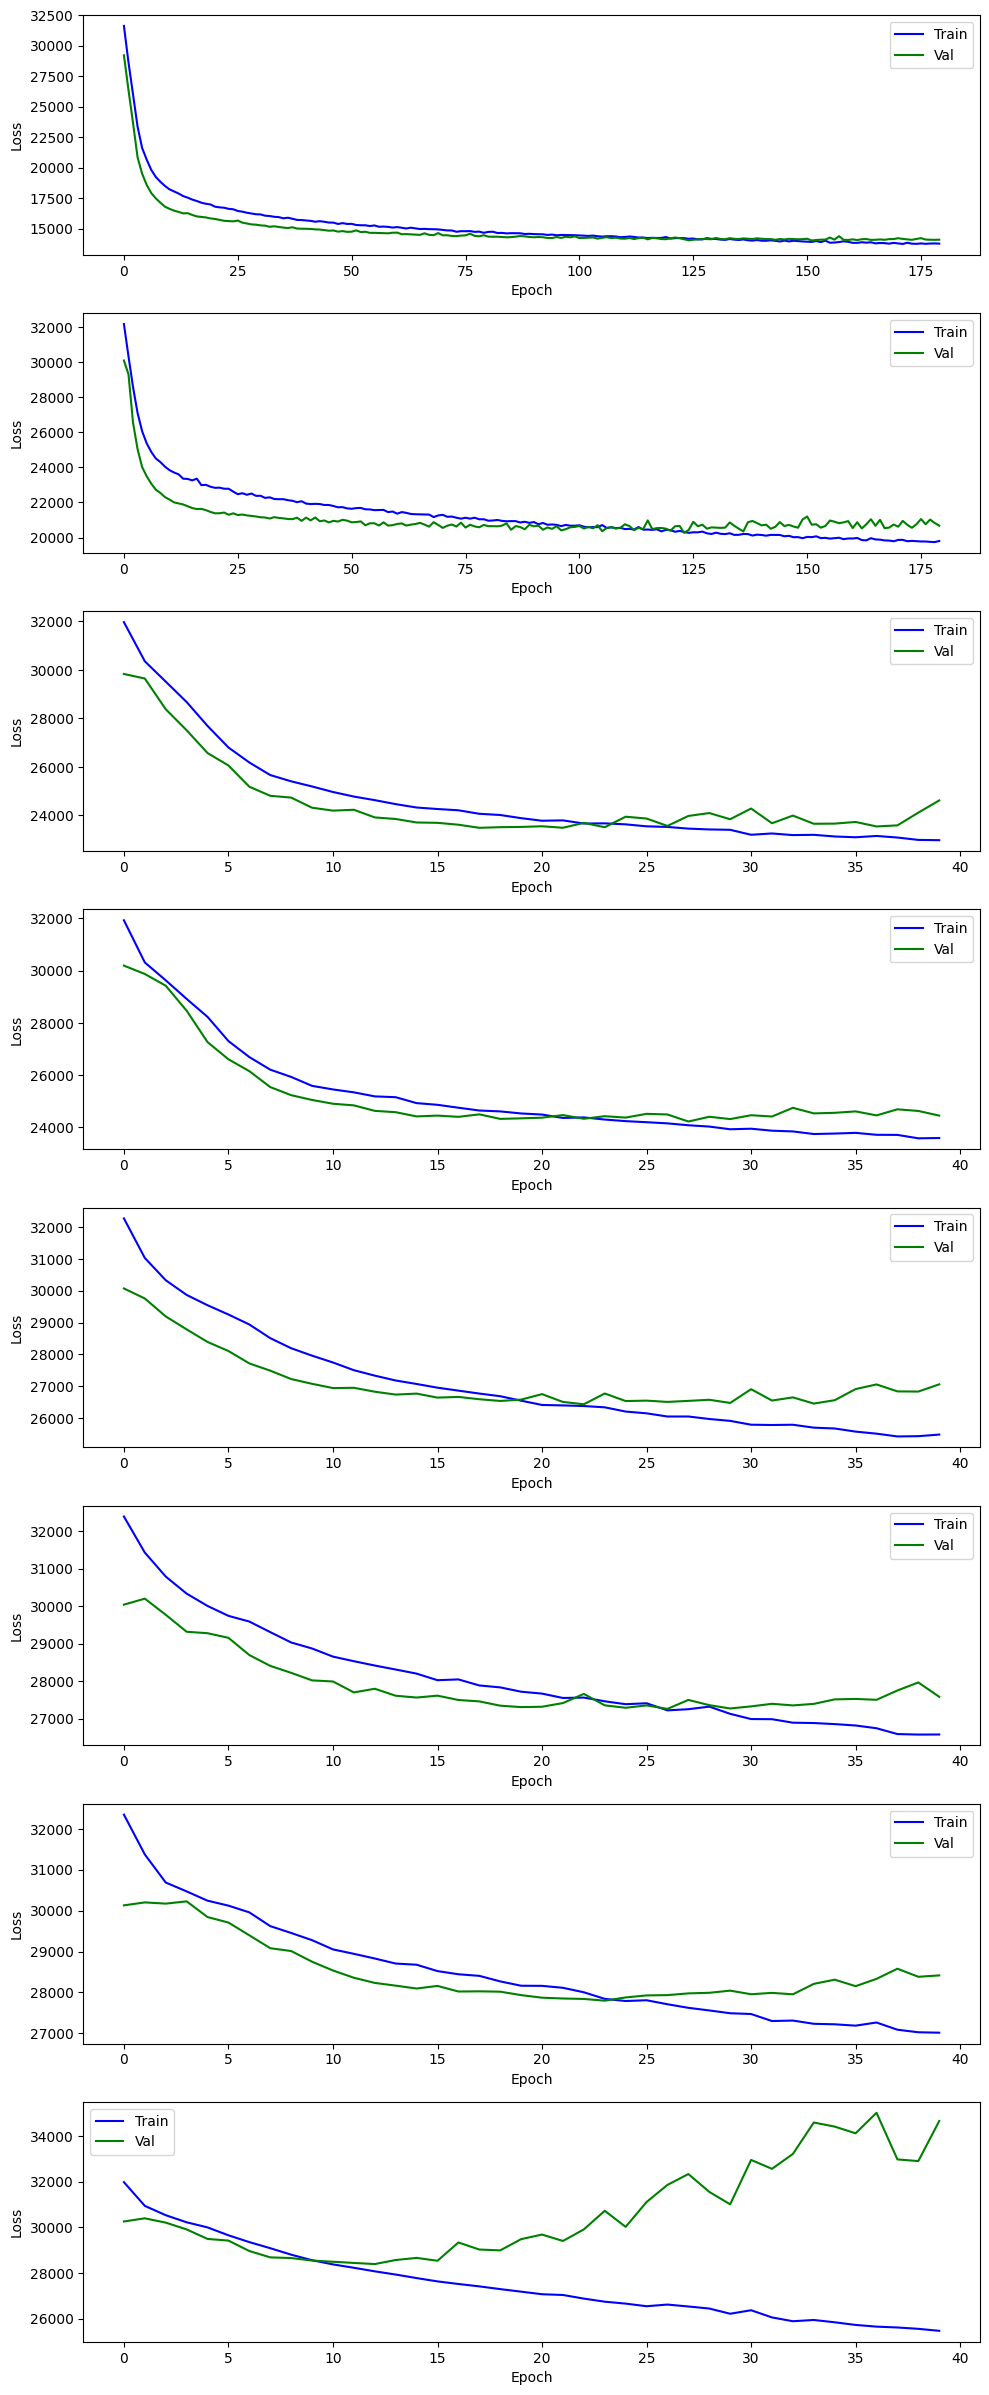

In [14]:
num_models = 8
inference_helpers.arrange_figures_in_rows(n_rows=num_models, prefix="forward_")